In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ushape.csv')

In [3]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

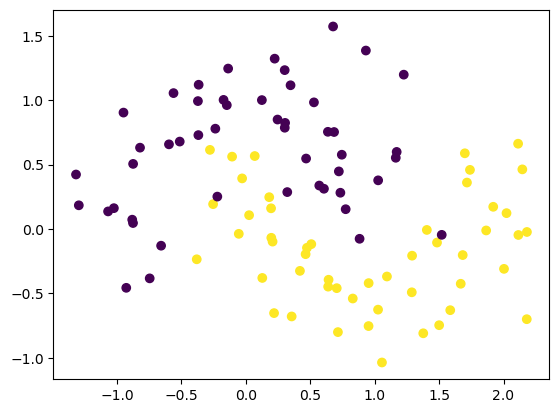

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

In [5]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
X=np.array(X)

In [6]:
clf.fit(X,y)

LogisticRegression()

<Axes: >

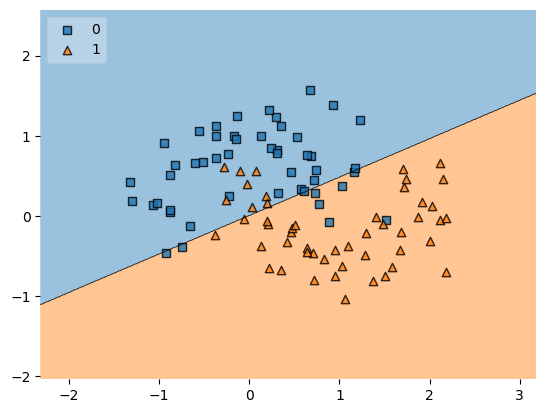

In [7]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf,legend=2)

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
np.mean(cross_val_score(clf,X,y,scoring='accuracy',cv=10))

0.8300000000000001

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()

In [11]:
def polynomial_function(X,y,degree=1):
        poly=PolynomialFeatures(degree=degree,include_bias=False)
        X_trf=poly.fit_transform(X)
        clf=LogisticRegression()
        clf.fit(X_trf,y)
        accuracy=np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
        a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
        b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)
        XX,YY=np.meshgrid(a,b)
    
        input_array=np.array([XX.ravel(),YY.ravel()]).T

        labels=clf.predict(poly.transform(input_array))
    
        plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
        plt.scatter(X[:,0],X[:,1], c=y)
        plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

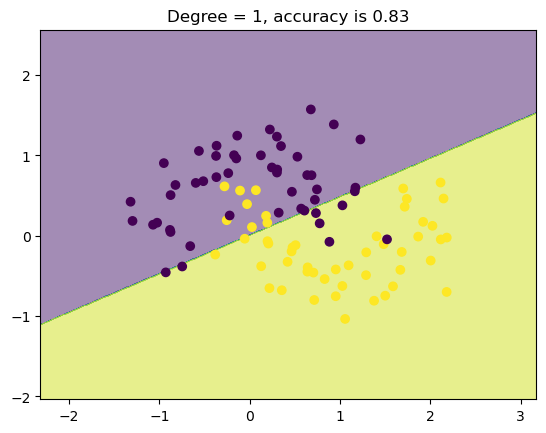

In [12]:
polynomial_function(X,y,degree=1)

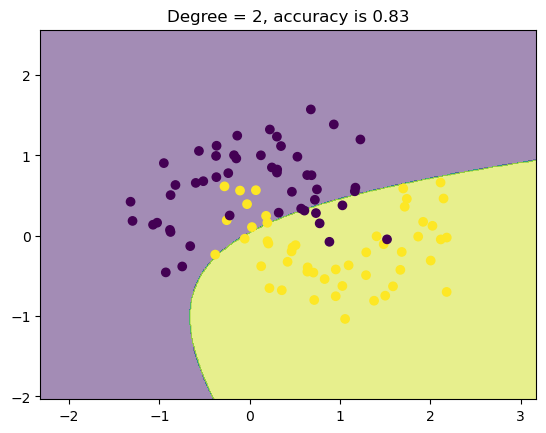

In [13]:
polynomial_function(X,y,degree=2)

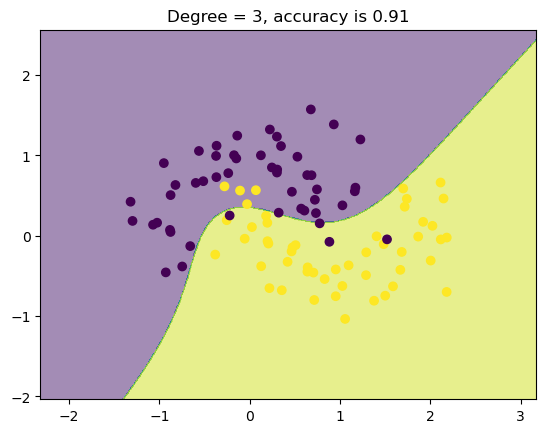

In [14]:
polynomial_function(X,y,degree=3)

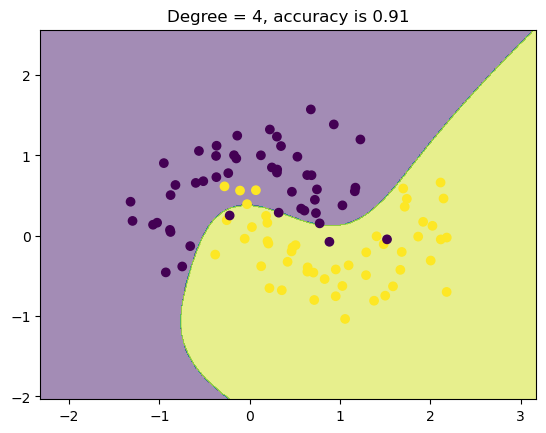

In [15]:
polynomial_function(X,y,degree=4)

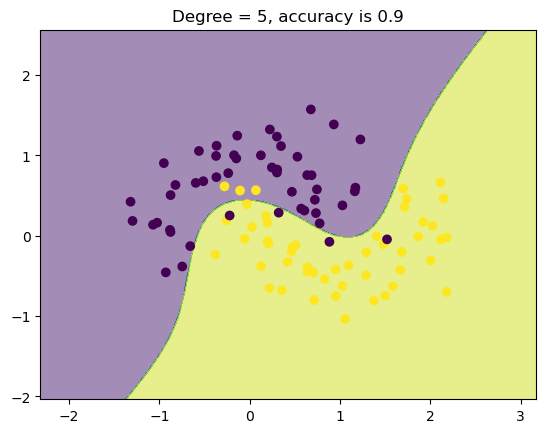

In [16]:
polynomial_function(X,y,degree=5)

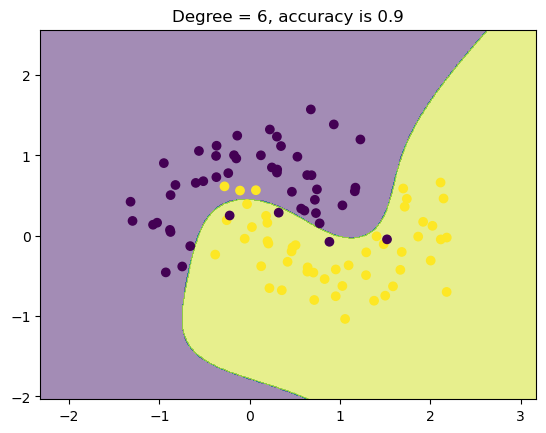

In [17]:
polynomial_function(X,y,degree=6)

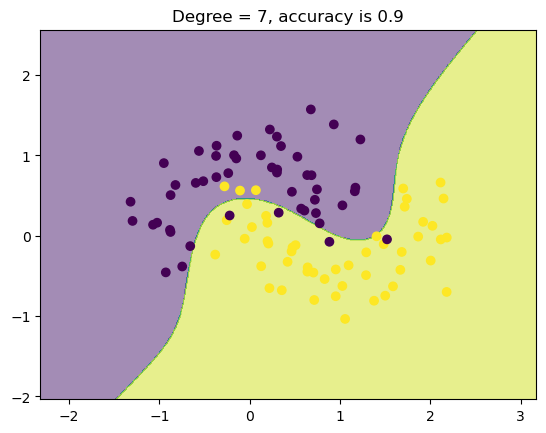

In [18]:
polynomial_function(X,y,degree=7)

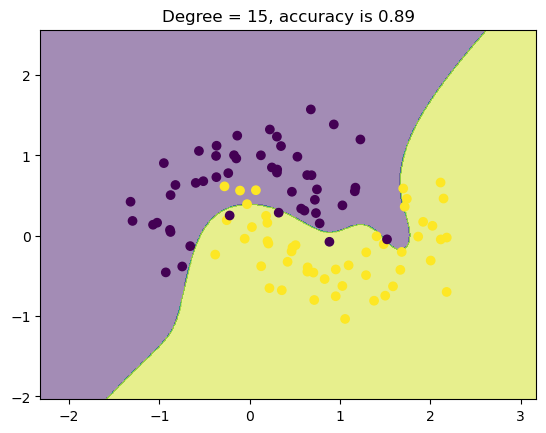

In [20]:
polynomial_function(X,y,degree=15)#overfitting